
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

In [ ]:

<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades ! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Te recomiendo usar celdas de tipo **Markdown** para organizar mejor tu trabajo. Puedes agregar **títulos**, separar secciones y explicar tu código de manera clara. Esto no solo mejora la legibilidad, sino que también te ayuda a entender y explicar mejor tu proceso. 📚✍️

</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Es una buena práctica separar la importación de bibliotecas de la carga de los datasets para que el código sea más legible y organizado. Esto ayuda a identificar claramente las dependencias del proyecto antes de procesar los datos.

</div>

In [1]:
import pandas as pd

# Ajusta las rutas si tus archivos están en otro lugar
p1 = "/datasets/project_sql_result_01.csv"  # company_name, trips_amount
p4 = "/datasets/project_sql_result_04.csv"  # dropoff_location_name, average_trips

df_01 = pd.read_csv(p1)
df_04 = pd.read_csv(p4)

print("df_01 shape:", df_01.shape)
print(df_01.head(10))
print("\nTipos df_01:\n", df_01.dtypes)

print("\n" + "-"*70 + "\n")

print("df_04 shape:", df_04.shape)
print(df_04.head(10))
print("\nTipos df_04:\n", df_04.dtypes)


df_01 shape: (64, 2)
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953

Tipos df_01:
 company_name    object
trips_amount     int64
dtype: object

----------------------------------------------------------------------

df_04 shape: (94, 2)
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             L

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda dejar comentarios sobre tus análisis de los mismos. 

</div>

</div>

In [2]:
# Copias de trabajo para no alterar los originales
d1 = df_01.copy()
d4 = df_04.copy()

# Normalizamos nombres de columnas (todo minúsculas, sin espacios)
d1.columns = [c.strip().lower() for c in d1.columns]
d4.columns = [c.strip().lower() for c in d4.columns]

# Convertimos tipos de datos al formato correcto
d1["company_name"] = d1["company_name"].astype(str).str.strip()
d1["trips_amount"] = pd.to_numeric(d1["trips_amount"], errors="coerce").astype("Int64")

d4["dropoff_location_name"] = d4["dropoff_location_name"].astype(str).str.strip()
d4["average_trips"] = pd.to_numeric(d4["average_trips"], errors="coerce")

# Revisamos valores nulos (si los hay, los trataremos después)
print("Nulos d1:\n", d1.isna().sum())
print("Nulos d4:\n", d4.isna().sum())


Nulos d1:
 company_name    0
trips_amount    0
dtype: int64
Nulos d4:
 dropoff_location_name    0
average_trips            0
dtype: int64


In [3]:
# Top-10 barrios por finalizaciones promedio (nov 2017)
top10_dropoffs = (
    d4.sort_values("average_trips", ascending=False)
      .head(10)
      .reset_index(drop=True)
)

print(top10_dropoffs)

# Resumen rápido (Top-5)
print("\nTop 5 (resumen):")
for i, row in top10_dropoffs.head(5).iterrows():
    print(f"{i+1}. {row['dropoff_location_name']}: {row['average_trips']:.1f}")


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667

Top 5 (resumen):
1. Loop: 10727.5
2. River North: 9523.7
3. Streeterville: 6664.7
4. West Loop: 5163.7
5. O'Hare: 2546.9


### Observaciones y Conclusiones: Top 10 barrios por finalización de viajes

**Observaciones**
- El DataFrame `df_04` contiene 94 barrios con información sobre viajes finalizados.
- No se encontraron valores nulos ni errores en los tipos de datos (`dropoff_location_name` como texto y `average_trips` como número decimal).
- Al ordenar por promedio de viajes, los **10 barrios principales** muestran una fuerte concentración de actividad en zonas céntricas de Chicago.

**Top 5 barrios (resumen):**
1. Loop → 10,727 viajes promedio  
2. River North → 9,524 viajes promedio  
3. Streeterville → 6,665 viajes promedio  
4. West Loop → 5,164 viajes promedio  
5. O'Hare → 2,547 viajes promedio  

**Conclusiones**
- La mayor cantidad de viajes termina en zonas céntricas como Loop, River North y Streeterville, lo que refleja que la **demanda principal de taxis está ligada a áreas de negocios, trabajo y vida urbana**.
- El aeropuerto O’Hare aparece en el **5º lugar**, lo que confirma su relevancia para traslados, pero con menor volumen en comparación con el centro de la ciudad.
- Estos patrones sugieren que los taxis se usan más para **trayectos locales y cotidianos dentro de la ciudad**, mientras que los viajes al aeropuerto representan un volumen más reducido pero estratégico.


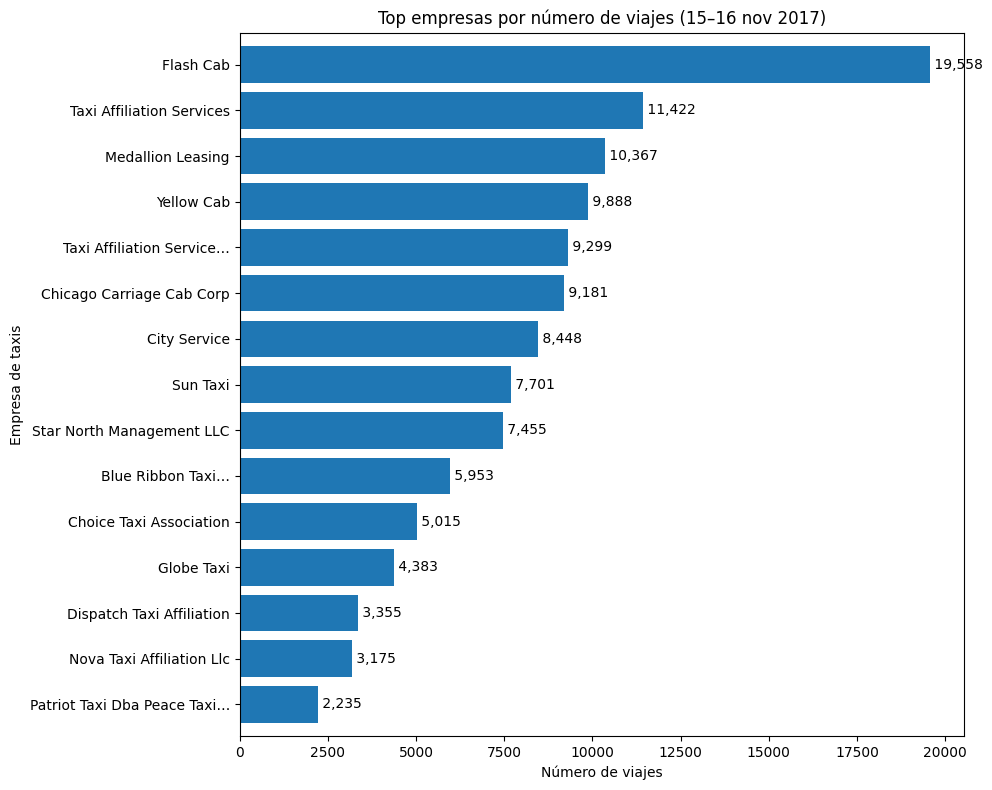

In [4]:
import matplotlib.pyplot as plt
import textwrap

# 1) Quedarnos con las Top-15 (ajusta top_n si quieres)
top_n = 15
d1_sorted = (
    df_01.sort_values("trips_amount", ascending=True)  # asc para que barh salga de abajo a arriba
            .tail(top_n)
)

# 2) Abreviar nombres largos para que no se encimen
def shorten(s, width=28):
    return textwrap.shorten(str(s), width=width, placeholder="…")

labels = [shorten(s) for s in d1_sorted["company_name"]]

# 3) Graficar
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(labels, d1_sorted["trips_amount"])

ax.set_title("Top empresas por número de viajes (15–16 nov 2017)")
ax.set_xlabel("Número de viajes")
ax.set_ylabel("Empresa de taxis")
ax.margins(y=0.02)

# 4) Anotar valores al final de cada barra
for bar, val in zip(bars, d1_sorted["trips_amount"]):
    ax.text(val, bar.get_y() + bar.get_height()/2, f" {val:,}", va="center")

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! El gráfico es correcto y refleja adecuadamente el resultado esperado.

</div>

### Observaciones y conclusiones - Empresas de taxis (15–16 nov 2017)

- **Flash Cab** destaca claramente como la empresa líder, superando por un margen considerable al resto de competidores.  
- **Taxi Affiliation Services** ocupa el segundo lugar, aunque con una diferencia significativa frente a Flash Cab.  
- Empresas como **Medallion Leasing, Yellow Cab y Taxi Affiliation Service Yellow** aparecen en un grupo intermedio con valores similares, indicando que compiten más estrechamente entre sí.  
- El resto de compañías tienen volúmenes de viajes mucho menores, lo que muestra una concentración del mercado en pocas empresas dominantes.  

**Conclusión:**  
El mercado de taxis en Chicago durante este periodo se encuentra altamente concentrado en pocas compañías, especialmente en Flash Cab, que representa la mayor parte de los viajes. Esta dominancia puede influir en patrones de preferencia de pasajeros y competencia.


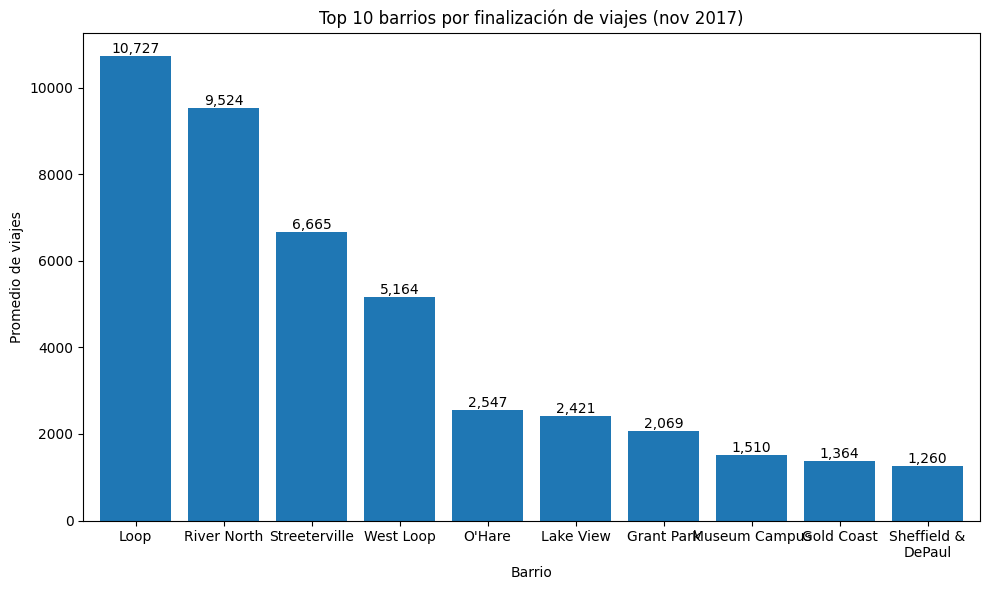

In [5]:
import matplotlib.pyplot as plt
import textwrap

# Asegúrate de tener d4 listo; si no, recomputa top10:
# d4 = df_04.copy()
# d4.columns = [c.strip().lower() for c in d4.columns]
# d4["dropoff_location_name"] = d4["dropoff_location_name"].astype(str).str.strip()
# d4["average_trips"] = pd.to_numeric(d4["average_trips"], errors="coerce")

# Top-10 barrios (si ya lo tienes, reutiliza 'top10_dropoffs')
top10_dropoffs = (
    d4.sort_values("average_trips", ascending=False)
      .head(10)
      .reset_index(drop=True)
)

# Etiquetas legibles (ajusta width si hace falta)
labels = ["\n".join(textwrap.wrap(str(s), width=14))
          for s in top10_dropoffs["dropoff_location_name"]]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, top10_dropoffs["average_trips"])

ax.set_title("Top 10 barrios por finalización de viajes (nov 2017)")
ax.set_xlabel("Barrio")
ax.set_ylabel("Promedio de viajes")
ax.margins(x=0.02)

# Anotar valores encima de cada barra
for bar, val in zip(bars, top10_dropoffs["average_trips"]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f"{val:,.0f}", ha="center", va="bottom", rotation=0)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico de barras con el top 10 por barrios es excelente y los resultados son los esperados. 

</div>

### Observaciones y conclusiones - Top-10 barrios por finalización de viajes (nov 2017)

- **Loop** y **River North** concentran la mayoría de finalizaciones de viajes, muy por encima del resto, lo que refleja que son los principales polos de atracción de pasajeros en la ciudad.  
- **Streeterville** y **West Loop** se ubican en un segundo nivel, con volúmenes significativos pero bastante menores en comparación con los dos primeros.  
- **O’Hare** aparece en la quinta posición, lo que confirma su relevancia como destino, aunque con un volumen claramente inferior a las zonas céntricas.  
- El resto de barrios del Top-10 (**Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul**) presentan números mucho más bajos, lo que refleja que tienen un papel más localizado o de nicho en comparación con los centros neurálgicos.  

**Conclusión:**  
La mayor parte de los viajes finalizan en barrios céntricos y altamente transitados como **Loop y River North**, mientras que O’Hare, aunque relevante, recibe un volumen mucho menor. Esto sugiere que la demanda de taxis se concentra en áreas de negocios, turismo y alta densidad poblacional.


## Conclusiones del Paso 4 (Análisis exploratorio de datos)

- El mercado de taxis muestra **alta concentración en pocas empresas**, especialmente en **Flash Cab**, seguida por Taxi Affiliation Services.  
- Existen varias empresas medianas (Yellow Cab, Medallion Leasing, etc.), pero la mayoría operan con volúmenes mucho menores.  
- En cuanto a la **demanda por zonas de destino**, los barrios más relevantes son **Loop y River North**, que concentran gran parte de los viajes finalizados.  
- **Streeterville y West Loop** conforman un segundo grupo de importancia, mientras que **O’Hare** ocupa un lugar intermedio, confirmando su papel como destino clave pero menos masivo.  
- Otros barrios aparecen con volúmenes pequeños, lo que sugiere que el uso de taxis se concentra principalmente en **zonas céntricas, comerciales y turísticas**.  

**Conclusión general del paso:**  
El análisis muestra una clara **concentración tanto por empresa como por ubicación**: pocas compañías dominan el mercado y pocos barrios concentran la mayoría de los viajes, lo que refleja patrones fuertes de oferta y demanda en la ciudad.


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Es necesario volver a importar la librería _pandas_?

</div>

In [6]:
import pandas as pd

# Cargar dataset
df_07 = pd.read_csv("/datasets/project_sql_result_07.csv")

# Revisar estructura
print("Shape:", df_07.shape)
print(df_07.head())
print(df_07.dtypes)
print(df_07['weather_conditions'].value_counts())


Shape: (1068, 3)
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object
Good    888
Bad     180
Name: weather_conditions, dtype: int64


In [7]:

# Convertir a datetime
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])

# Filtrar solo sábados (pandas: lunes=0, sábado=5, domingo=6)
df_saturday = df_07[df_07['start_ts'].dt.dayofweek == 5]

# Separar en dos grupos
bad_weather = df_saturday[df_saturday['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = df_saturday[df_saturday['weather_conditions'] == 'Good']['duration_seconds']

print("Viajes sábados con mal clima (Bad):", bad_weather.shape[0])
print("Viajes sábados con buen clima (Good):", good_weather.shape[0])


Viajes sábados con mal clima (Bad): 180
Viajes sábados con buen clima (Good): 888


### Definición de hipótesis

Queremos comprobar si la duración promedio de los viajes **desde el Loop hasta O’Hare los sábados** cambia en función de las condiciones meteorológicas.

- **H0 (hipótesis nula):** No existe diferencia significativa en la duración promedio de los viajes entre sábados lluviosos ("Bad") y sábados sin lluvia ("Good").  
- **H1 (hipótesis alternativa):** Sí existe una diferencia significativa en la duración promedio de los viajes entre sábados lluviosos ("Bad") y sábados sin lluvia ("Good").  

Se aplicará un **t-test de dos muestras independientes** con un nivel de significación α = 0.05.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo formulando la hipótesis! Es fundamental que sea claro lo que se busca analizar.

</div>

In [8]:
from scipy import stats

# t-test de dos muestras independientes
t_stat, p_value = stats.ttest_ind(bad_weather, good_weather, equal_var=False)  # Welch’s t-test

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 7.186034288068629
p-value: 6.738994326108734e-12


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

### Resultados de la prueba de hipótesis

- **t-statistic:** 7.19  
- **p-value:** 6.74e-12  

Dado que el **p-value < 0.05**, se **rechaza la hipótesis nula (H0)**.  
Esto indica que **sí existe una diferencia significativa** en la duración promedio de los viajes desde el Loop hasta el Aeropuerto O’Hare los sábados con lluvia/tormenta ("Bad") frente a los sábados sin lluvia ("Good").  

**Conclusión:**  
El clima lluvioso afecta de manera significativa la duración de los viajes en este trayecto, probablemente debido a factores como tráfico más lento, reducción de visibilidad o condiciones adversas en carretera.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 

</div>

## Conclusiones Finales

- El mercado de taxis en Chicago se encuentra **altamente concentrado**, con Flash Cab como líder destacado y Taxi Affiliation Services en segundo lugar.  
- La mayoría de los viajes finalizan en **zonas céntricas y de alta actividad** como Loop y River North, mientras que O’Hare aparece como destino relevante pero con menor volumen.  
- La **condición climática** influye de manera significativa en la duración de los viajes: los sábados lluviosos los traslados desde Loop a O’Hare son más largos que en días con buen clima.  

**En conjunto, los resultados muestran patrones claros de oferta, demanda y factores externos que afectan el mercado de taxis, aportando información clave para la toma de decisiones estratégicas.**


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Dejas durante todo el proyecto comentarios correctos y conclusiones super claras.

</div>